In [14]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
np.random.seed(1)

X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40)

In [16]:
from sklearn.model_selection import validation_curve


In [17]:
degree = np.arange(0, 21)

In [19]:
train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(degree=2), LinearRegression()), 
                                        X, y, "polynomialfeatures__degree", degree, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


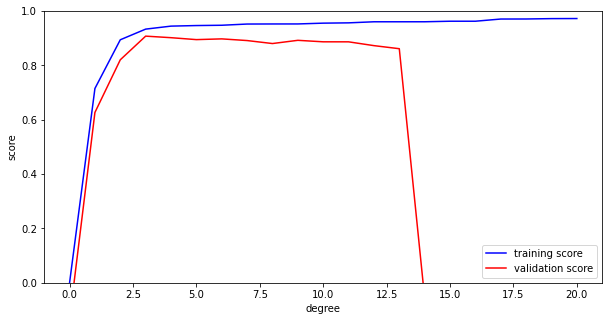

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(degree, np.median(train_score, axis=1), "b-", label='training score')
plt.plot(degree, np.median(val_score, axis=1), "r-", label='validation score')
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")
plt.legend(loc='best');

In [32]:
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)

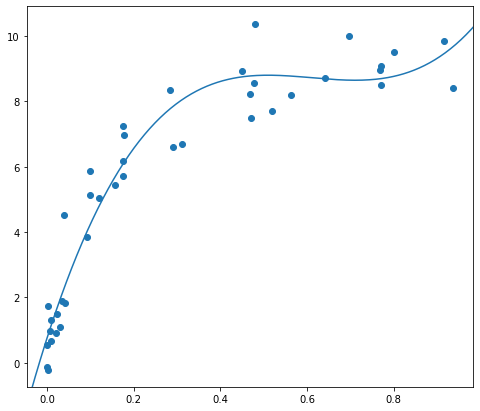

In [36]:
plt.figure(figsize=(8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = make_pipeline(PolynomialFeatures(degree=3), LinearRegression()).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);

In [37]:
from sklearn.model_selection import learning_curve

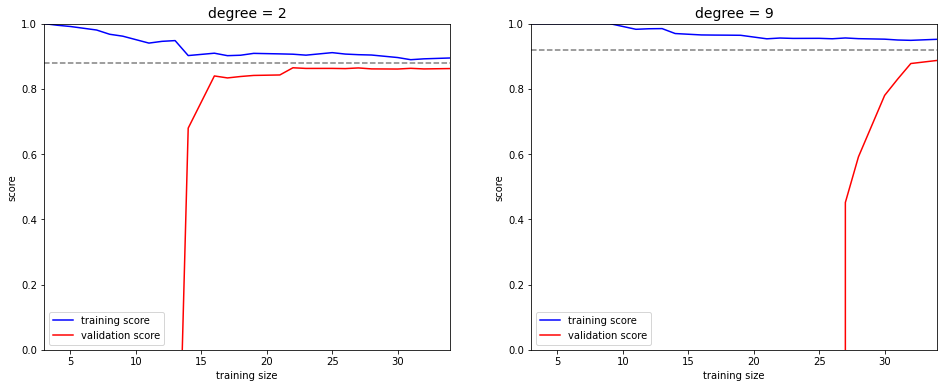

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for i, degree in enumerate([2, 9]):
    n, train_lc, val_lc = learning_curve(make_pipeline(PolynomialFeatures(degree=degree),
                                        LinearRegression()),
                                        X, y, cv=7, train_sizes=np.linspace(0.1, 1, 25))
    ax[i].plot(n, np.mean(train_lc, 1), "b-", label="training score")
    ax[i].plot(n, np.mean(val_lc, 1), "r-", label="validation score")
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), n[0], n[-1], color="gray", linestyle='dashed')
    ax[i].set(xlim=(n[0], n[-1]), ylim=(0, 1), xlabel = "training size", ylabel="score")
    ax[i].set_title("degree = {}".format(degree), size=14)
    ax[i].legend(loc="best");

In [41]:
from sklearn.model_selection import GridSearchCV

In [48]:
params = {"polynomialfeatures__degree" : np.arange(21),
          "linearregression__fit_intercept" : [True, False],
          "linearregression__normalize" : [True, False]}

In [49]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(),
                                LinearRegression()), params, cv=7)

In [50]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [52]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [53]:
model = grid.best_estimator_
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

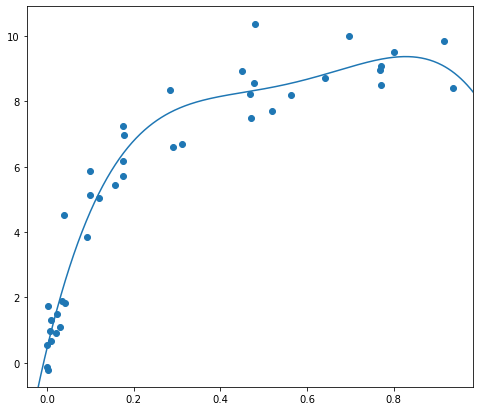

In [57]:
plt.figure(figsize=(8,7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);